 Predict NYC Airbnb rental price

 
As of August 2019, this data set contains almost 50 thousand airbnb listings in NYC. The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external dataset(s) with relevant information.

 

Columns -



idlisting ID

Name- name of the listing

host_idhost ID

Host_name - name of the host

Neighbourhood group - location

Neighbourhood - area

Latitude - latitude coordinates

Longitude - longitude coordinates

room_typelisting space type

Price - price in dollars

Minimum_nights - amount of nights minimum

Number_of_reviews - number of reviews

Last_review - latest review

Reviews_per_month - number of reviews per month

Calculated_host_listings_count - amount of listing per host

Availability_365 - number of days when listing is available for booking





Acknowledgement - 




1)  http://insideairbnb.com/

2) https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/tasks?taskId=181


Dataset link: https://drive.google.com/file/d/1klBfc-oLrbyWaKw8MsXZTp_-qfEfRwjg/view?usp=sharing

In [290]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split

In [291]:
df=pd.read_csv('AB_NYC_2019.csv')

In [292]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [294]:
print('number of samples: ',df.shape[0])
print('number of columns: ',df.shape[1])

number of samples:  48895
number of columns:  16


In [295]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

EDA and Pre-processing 

From the above we can see both columns reviews_per_month and last_review have the same large amount of null values. Also number of null values for host_name and name are different.

In [296]:
df['name'].value_counts()

Hillside Hotel                                       18
Home away from home                                  17
New york Multi-unit building                         16
Brooklyn Apartment                                   12
Private Room                                         11
                                                     ..
Sun-filled, Modern Bedroom in Williamsburg.           1
1 Bedroom Garden Apartment, Harlem                    1
Madison Avenue Studio Suite (2)                       1
HUGE Sundrenching Apartment Waiting Just For YOU!     1
Brooklyn Artist Loft                                  1
Name: name, Length: 47905, dtype: int64

In [297]:
df['last_review'].head(50)

0     2018-10-19
1     2019-05-21
2            NaN
3     2019-07-05
4     2018-11-19
5     2019-06-22
6     2017-10-05
7     2019-06-24
8     2017-07-21
9     2019-06-09
10    2019-06-22
11    2019-06-23
12    2019-06-24
13    2019-07-05
14    2018-10-31
15    2019-06-29
16    2019-06-28
17    2019-07-01
18    2019-06-22
19           NaN
20    2011-12-28
21    2019-07-01
22    2019-01-01
23    2019-07-02
24    2019-06-19
25    2019-06-23
26           NaN
27    2017-08-13
28    2019-06-15
29    2019-04-19
30    2019-06-01
31    2019-06-14
32    2019-06-15
33    2019-07-01
34    2019-05-12
35    2019-06-21
36           NaN
37    2019-06-22
38           NaN
39    2019-07-05
40    2019-06-21
41    2019-05-27
42    2018-09-30
43    2019-06-16
44    2019-06-13
45    2019-06-05
46    2019-07-01
47    2019-05-25
48    2017-01-01
49    2019-06-17
Name: last_review, dtype: object

#### Heatmap for null values 

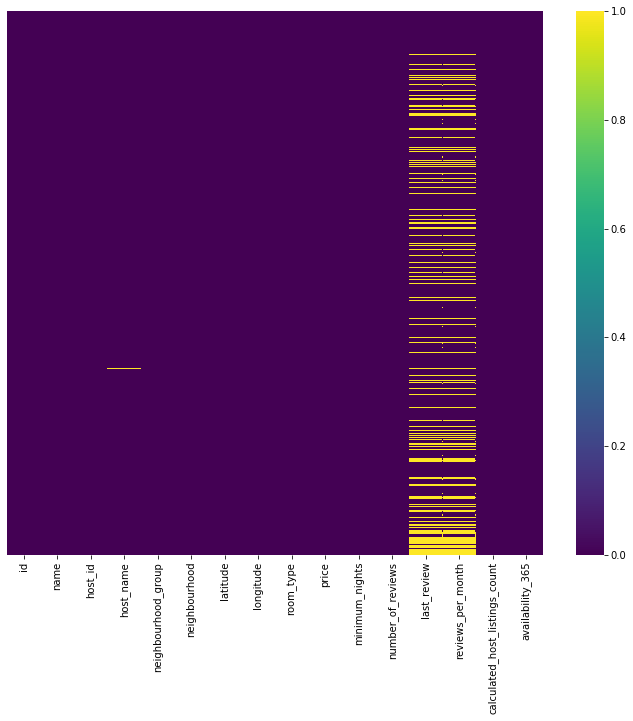

In [298]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')
plt.show()

In [299]:
df['reviews_per_month'].head(50)

0     0.21
1     0.38
2      NaN
3     4.64
4     0.10
5     0.59
6     0.40
7     3.47
8     0.99
9     1.33
10    0.43
11    1.50
12    1.34
13    0.91
14    0.22
15    1.20
16    1.72
17    2.12
18    4.44
19     NaN
20    0.07
21    1.09
22    0.37
23    0.61
24    0.73
25    1.37
26     NaN
27    0.49
28    1.11
29    0.24
30    2.04
31    1.42
32    1.65
33    2.37
34    0.66
35    1.41
36     NaN
37    1.96
38     NaN
39    1.81
40    2.08
41    0.39
42    0.23
43    0.69
44    0.84
45    0.49
46    2.25
47    0.52
48    0.10
49    1.16
Name: reviews_per_month, dtype: float64

it seems column number_of_reviews usually has a value of 0 when last_review is null. So column last_review may be dropped and also there are multi corelated


In [300]:
df.drop('last_review',axis=1,inplace=True)

And we can fillna the other columns that have null values

In [301]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)

In [302]:
df['reviews_per_month'].isnull().sum()

0

So reviews_per_month column is taken care for null values

In [303]:
df['name'].mode()

0    Hillside Hotel
dtype: object

In [304]:
df['name'].fillna(value='Hillside Hotel',inplace=True)

In [305]:
df['name'].isnull().sum()

0

So name column is taken care for null values

In [306]:
df['host_name'].unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [307]:
df['host_name'].mode()

0    Michael
dtype: object

In [308]:
df['host_name'].fillna(value='Michael',inplace=True)

In [309]:
df['host_name'].isnull().sum()

0

So host_name column is taken care for null values


In [310]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

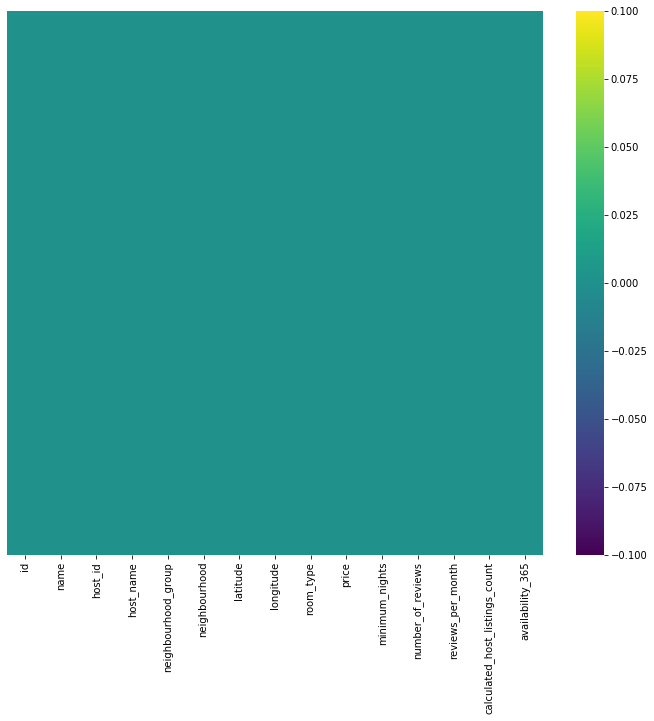

In [311]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')
plt.show()

In [312]:
# ALl the nill values are handaled 

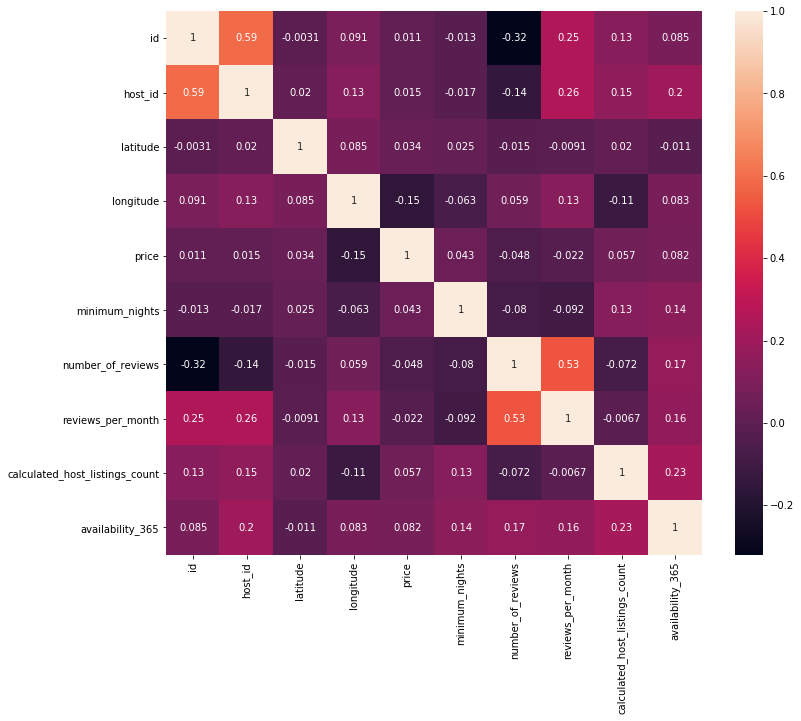

In [313]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

no high multi colinearity is there within the data set 

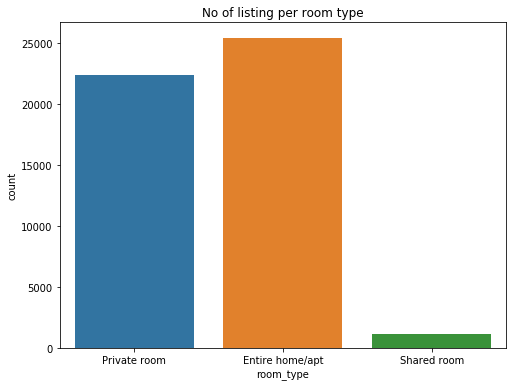

In [314]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['room_type'])
plt.title('No of listing per room type')
plt.show()

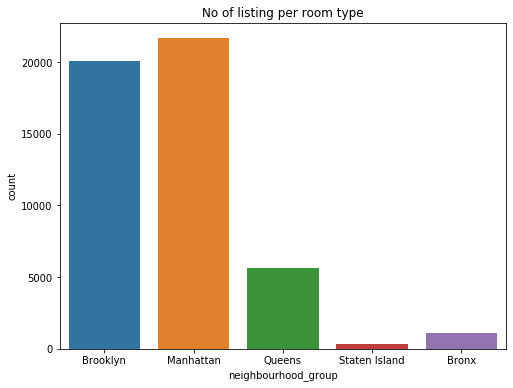

In [315]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['neighbourhood_group'])
plt.title('No of listing per room type')
plt.show()

In [316]:
for group_name in df['neighbourhood_group'].unique():
    neighbor = df[df['neighbourhood_group']==group_name]['neighbourhood'].value_counts(ascending=False)[:3]
    print('{} top 3 neighborhoods with corresponding count of listings:\n{} \n'.format(group_name,neighbor))

Brooklyn top 3 neighborhoods with corresponding count of listings:
Williamsburg          3920
Bedford-Stuyvesant    3714
Bushwick              2465
Name: neighbourhood, dtype: int64 

Manhattan top 3 neighborhoods with corresponding count of listings:
Harlem             2658
Upper West Side    1971
Hell's Kitchen     1958
Name: neighbourhood, dtype: int64 

Queens top 3 neighborhoods with corresponding count of listings:
Astoria             900
Long Island City    537
Flushing            426
Name: neighbourhood, dtype: int64 

Staten Island top 3 neighborhoods with corresponding count of listings:
St. George       48
Tompkinsville    42
Stapleton        27
Name: neighbourhood, dtype: int64 

Bronx top 3 neighborhoods with corresponding count of listings:
Kingsbridge    70
Fordham        63
Longwood       62
Name: neighbourhood, dtype: int64 



Text(0.5, 1.0, 'Number of listings in each neighborhood per room types')

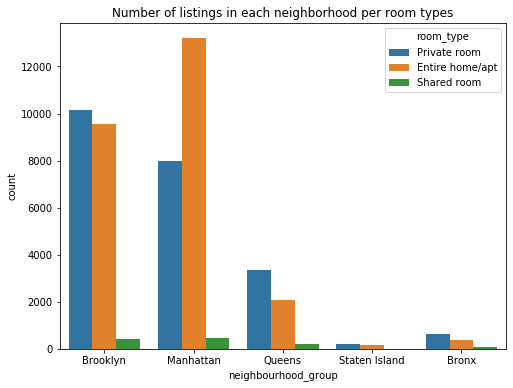

In [317]:
plt.figure(figsize=(8,6))
sns.countplot(x='neighbourhood_group',data=df,hue='room_type')
plt.title('Number of listings in each neighborhood per room types')

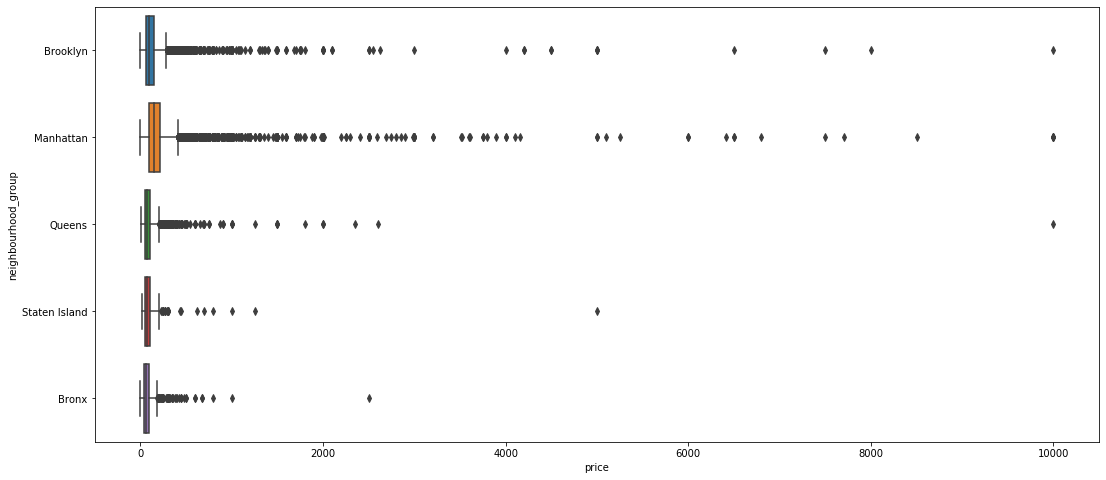

In [318]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df,x=df['price'],y=df['neighbourhood_group'])
plt.show()

There are a so many outliers in price vs negigbourhood_group

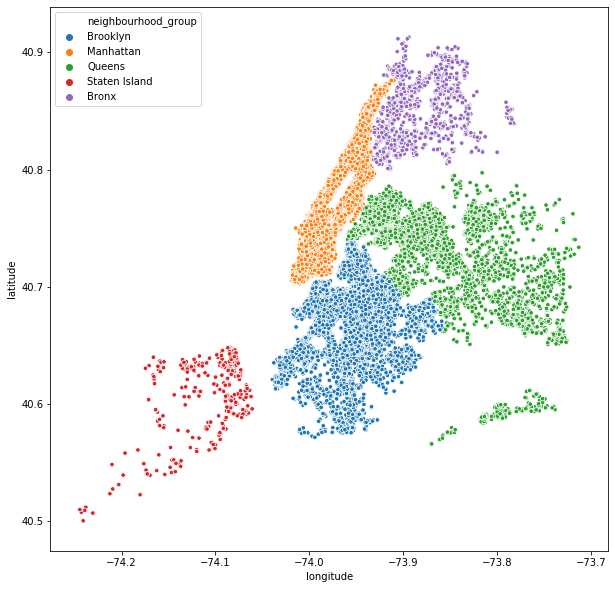

In [319]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=df)
plt.show()

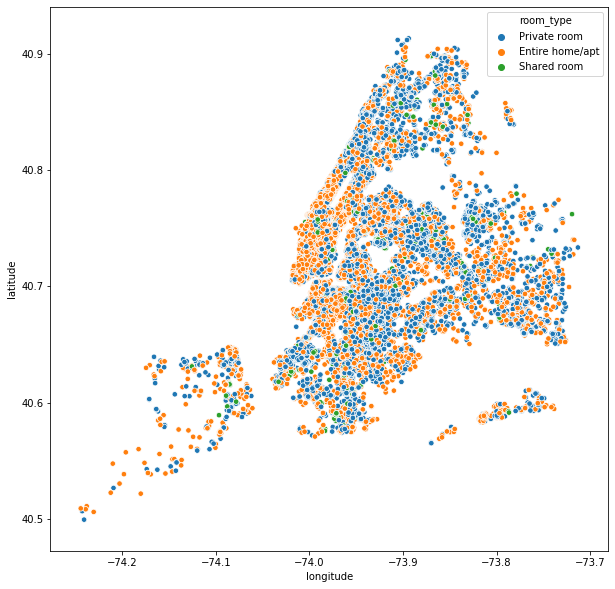

In [320]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='room_type',s=30, data=df)
plt.show()

In [321]:

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


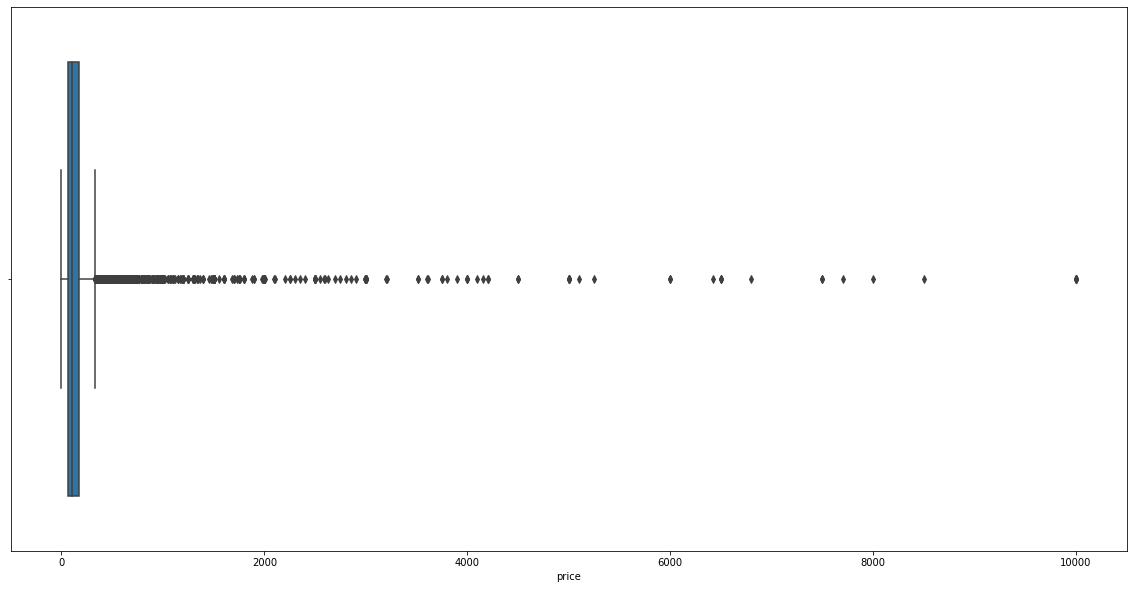

In [322]:
plt.figure(figsize=(20,10))
sns.boxplot(df['price'])
plt.show()

In [323]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
Q3+IQR*1.5


df = df[df['price'] < (Q3+IQR*1.5)]

In [324]:
df.shape

(45918, 15)

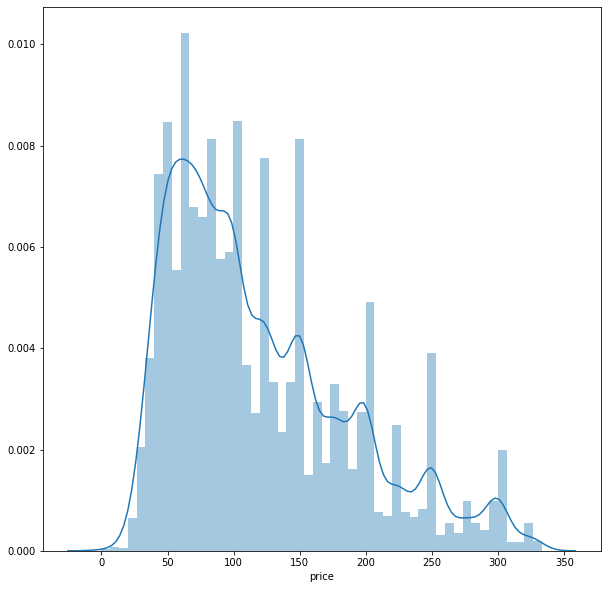

In [325]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'])
plt.show()

As the figure says the price distributation is not good it is right skewed 

In [326]:
print(skew(df['price'])) # the skwness is very high of the column 

0.9228946522465106


In [327]:
df=df.drop(['host_name', 'name', 'id'],axis=1)

In [328]:
# splitting the columns into object and numeric 
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(['int64','float64'])

In [329]:
df_cat.head(5)

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


In [330]:
from sklearn.preprocessing import LabelEncoder

In [331]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
df_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,1,107,1
1,2,126,0
2,2,93,1
3,1,41,0
4,2,61,0


In [332]:
df_new=pd.concat([df_cat,df_num],axis=1)

In [333]:
df_new.head()

,neighbourhood_group,neighbourhood,room_type,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,107,1,2787,40.64749,-73.97237,149,1,9,0.210000,6,365
1,2,126,0,2845,40.75362,-73.98377,225,1,45,0.380000,2,355
2,2,93,1,4632,40.80902,-73.94190,150,3,0,1.373221,1,365
3,1,41,0,4869,40.68514,-73.95976,89,1,270,4.640000,1,194
4,2,61,0,7192,40.79851,-73.94399,80,10,9,0.100000,1,0


In [334]:
df_mm=df_new.copy()

In [335]:
from sklearn.preprocessing import MinMaxScaler

In [336]:
columns = df_mm.columns.to_list()
columns.remove('price')

for col in columns:
    mm = MinMaxScaler()
    df_mm[col] = mm.fit_transform(df_mm[[col]])
df_mm.head()

,neighbourhood_group,neighbourhood,room_type,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.25,0.490826,0.5,0.000001,0.357393,0.511921,149,0.000000,0.014308,0.003419,0.015337,1.000000
1,0.50,0.577982,0.0,0.000001,0.614199,0.490469,225,0.000000,0.071542,0.006326,0.003067,0.972603
2,0.50,0.426606,0.5,0.000008,0.748252,0.569257,150,0.001601,0.000000,0.023307,0.000000,1.000000
3,0.25,0.188073,0.0,0.000009,0.448496,0.535649,89,0.000000,0.429253,0.079159,0.000000,0.531507
4,0.50,0.279817,0.0,0.000017,0.722820,0.565324,80,0.007206,0.014308,0.001539,0.000000,0.000000


In [337]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [338]:
X = df_mm.drop("price",axis=1)
y = np.log(df_mm['price']+0.01)

In [339]:
y.min()

-4.605170185988091

In [340]:
# as there are -inf value in the price column so log will wont work so here we've added 0.01 to save it from getting 0

In [341]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=121)

In [342]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_hat=linreg.predict(x_test)

In [343]:
r2_score(y_test,y_hat)

0.4924467982922708

In [344]:
mean_squared_error(y_test,y_hat)

0.1843070888755754

In [345]:
residuals=y_hat-y_test

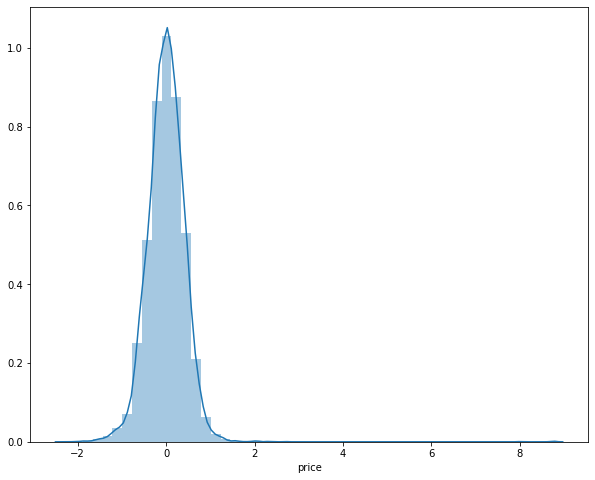

In [346]:
plt.figure(figsize=(10,8))
sns.distplot(residuals)
plt.show()

residuals are are not normally distribuated the data is positively skewed 

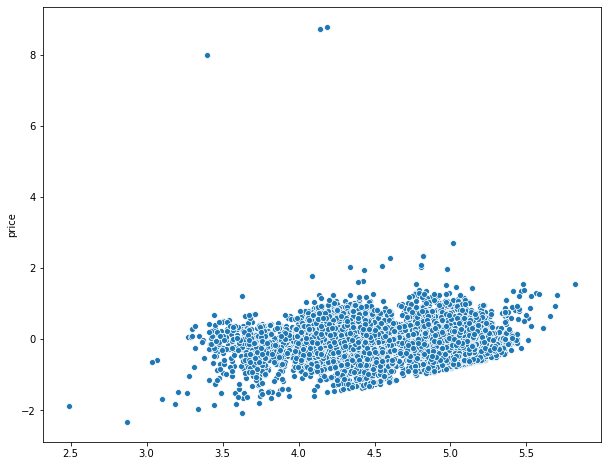

In [347]:
plt.figure(figsize=(10,8))
sns.scatterplot(y_hat, residuals)
plt.show()

residuals are homo skertisticals 

In [348]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test),
        'Predicted Values': y_hat}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,4.077707,4.240903
1,4.382152,4.225851
2,5.416145,4.961459
3,5.749425,5.360299
4,4.094511,4.286287


In [349]:
from sklearn.preprocessing import PolynomialFeatures

In [350]:
pf = PolynomialFeatures(2) #theta0, x0, x1, x2
x_poly = pf.fit_transform(x)
x_poly

array([[1.00000000e+00, 2.50000000e-01, 4.90825688e-01, ...,
        2.35236554e-04, 1.53374233e-02, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e-01, 5.77981651e-01, ...,
        9.40946216e-06, 2.98344399e-03, 9.45956089e-01],
       [1.00000000e+00, 5.00000000e-01, 4.26605505e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 5.00000000e-01, 4.26605505e-01, ...,
        0.00000000e+00, 0.00000000e+00, 5.47194596e-03],
       [1.00000000e+00, 5.00000000e-01, 4.31192661e-01, ...,
        2.35236554e-04, 8.40406757e-05, 3.00243948e-05],
       [1.00000000e+00, 5.00000000e-01, 4.31192661e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.97072622e-03]])

In [351]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=121)

In [352]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {}\nR2 = {}".format(mean_squared_error(y_test, y_hat), 
                                 r2_score(y_test, y_hat)))
residuals = y_test-y_hat

MSE = 0.1843070888755754
R2 = 0.4924467982922708


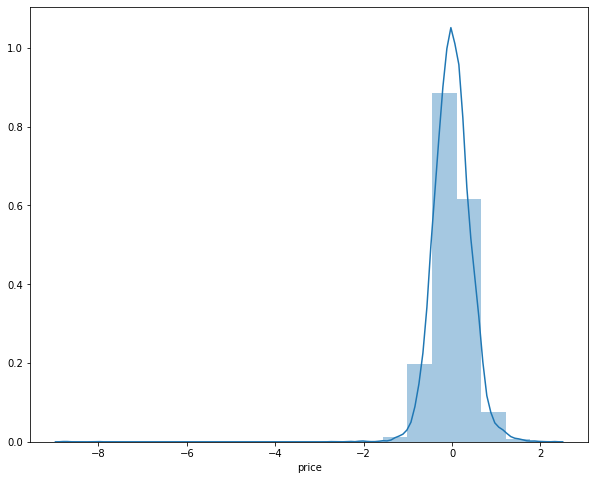

In [353]:
plt.figure(figsize=(10,8))
sns.distplot(residuals, bins=20)
plt.show()

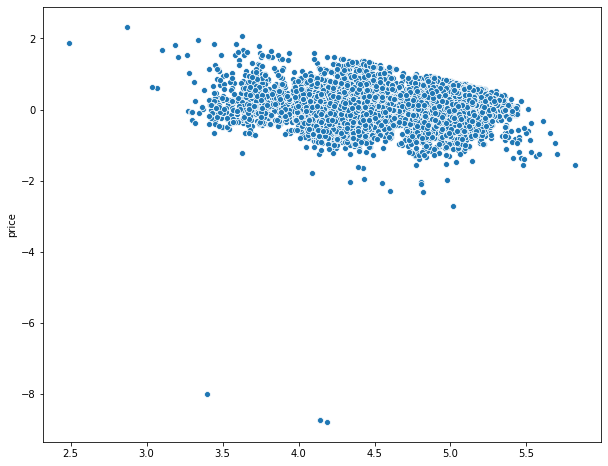

In [354]:
plt.figure(figsize=(10,8))
sns.scatterplot(y_hat, residuals)
plt.show()

MSE = 0.1843070888755754
R2 = 0.4924467982922708


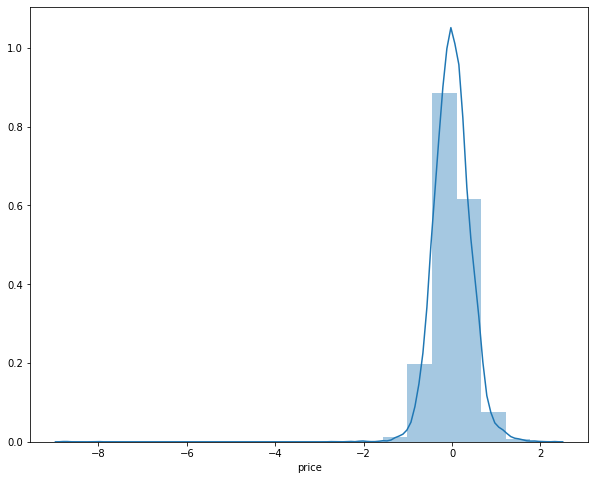

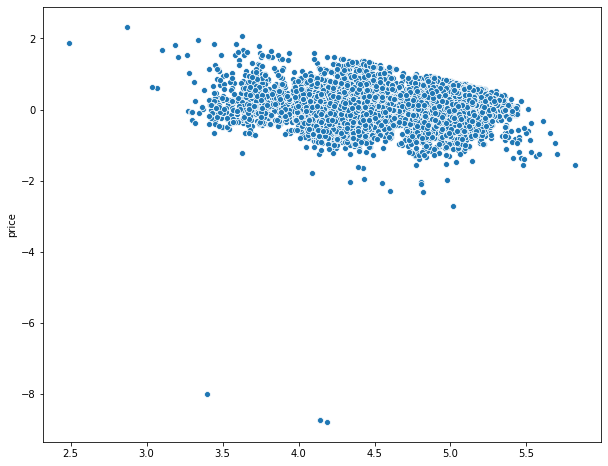

In [355]:
pf = PolynomialFeatures(4) #theta0, x0, x1, x2
x_poly = pf.fit_transform(x)
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=121)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {}\nR2 = {}".format(mean_squared_error(y_test, y_hat), 
                                 r2_score(y_test, y_hat)))
residuals = y_test-y_hat
plt.figure(figsize=(10,8))
sns.distplot(residuals, bins=20)
plt.show()
plt.figure(figsize=(10,8))
sns.scatterplot(y_hat, residuals)
plt.show()

In [356]:
from sklearn.ensemble import RandomForestRegressor

In [357]:
regrRM = RandomForestRegressor(n_estimators=500, max_depth = 10)
regrRM.fit(x_train, y_train)
y_pred = regrRM.predict(x_test)
print(regrRM.score(x_test,y_test))

0.6107527972009973


In [358]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
20568,4.077707,4.233783
38445,4.382152,4.207158
10355,5.416145,5.019023
48566,5.749425,5.594907
11808,4.094511,4.264732


In [359]:
# this is a good score as of now 

In [360]:
regrRM = RandomForestRegressor(n_estimators=500, max_depth = 15)
regrRM.fit(x_train, y_train)
y_pred = regrRM.predict(x_test)
print(regrRM.score(x_test,y_test))

0.6232092694697566


In [361]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
20568,4.077707,4.169130
38445,4.382152,4.265705
10355,5.416145,5.005073
48566,5.749425,5.642888
11808,4.094511,4.238834


In [362]:
regrRM = RandomForestRegressor(n_estimators=500, max_depth = 20)
regrRM.fit(x_train, y_train)
y_pred = regrRM.predict(x_test)
print(regrRM.score(x_test,y_test))

0.6253123300314483


In [363]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
20568,4.077707,4.162124
38445,4.382152,4.293966
10355,5.416145,4.989535
48566,5.749425,5.655742
11808,4.094511,4.258538


In [364]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100)

In [365]:
gbr.fit(x_train,y_train)
gbr.score(x_test,y_test)

0.6006851566158232

In [366]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [367]:
import xgboost as xgb

In [368]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 2, n_estimators = 500)
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test, y_test)

0.6084437444322957

In [369]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 2, n_estimators = 100)
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test, y_test)


0.6140641932850455

In [370]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 2, n_estimators = 3000)
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test, y_test)

0.6024046320478361

Conclusion : we tried different model according to the dataset but the RandomForestRegressor with n_estimators=500, max_depth = 20 gives us the best output. with very minimum residuals.